In [13]:
import pandas as pd
import nltk
import spacy

In [14]:
from nltk import pos_tag, word_tokenize, RegexpParser

In [15]:
nlp = spacy.load('en_core_web_sm')

In [16]:
df = pd.read_csv('D:\\EduNet\\NSTI Indore\\AI\\NLP\\Dataset\\resume_dataset.csv')
df

,Resume_ID,Resume_Text,Extracted_Job_Title,Extracted_Company_Name,Extracted_Skills
0,1,Software Engineer with 5 years experience at G...,Software Engineer,Google,"['Python', 'Java', 'Cloud Computing']"
1,2,"Data Scientist at Microsoft, proficient in Mac...",Data Scientist,Microsoft,"['Machine Learning', 'SQL', 'Deep Learning']"
2,3,Marketing Manager with expertise in digital ma...,Marketing Manager,Amazon,"['Digital Marketing', 'SEO', 'Branding']"
3,4,"Senior Developer with experience in C++, Kuber...",Senior Developer,IBM,"['C++', 'Kubernetes', 'Microservices']"
4,5,HR Manager with a strong background in recruit...,HR Manager,Tesla,"['Recruitment', 'Employee Engagement', 'Compli..."


Tokenized Paragraph

In [17]:
sampleresume = df['Resume_Text'][0]
print(sampleresume)
sentance = nltk.sent_tokenize(sampleresume)
words = nltk.word_tokenize(sampleresume)
words

Software Engineer with 5 years experience at Google, skilled in Python, Java, and cloud computing.


['Software',
 'Engineer',
 'with',
 '5',
 'years',
 'experience',
 'at',
 'Google',
 ',',
 'skilled',
 'in',
 'Python',
 ',',
 'Java',
 ',',
 'and',
 'cloud',
 'computing',
 '.']

Parts of Speech Tagging

In [18]:
pos_tags = pos_tag(words)
pos_tags

[('Software', 'NNP'),
 ('Engineer', 'NNP'),
 ('with', 'IN'),
 ('5', 'CD'),
 ('years', 'NNS'),
 ('experience', 'NN'),
 ('at', 'IN'),
 ('Google', 'NNP'),
 (',', ','),
 ('skilled', 'VBD'),
 ('in', 'IN'),
 ('Python', 'NNP'),
 (',', ','),
 ('Java', 'NNP'),
 (',', ','),
 ('and', 'CC'),
 ('cloud', 'JJ'),
 ('computing', 'NN'),
 ('.', '.')]

Chunking using RegexParser

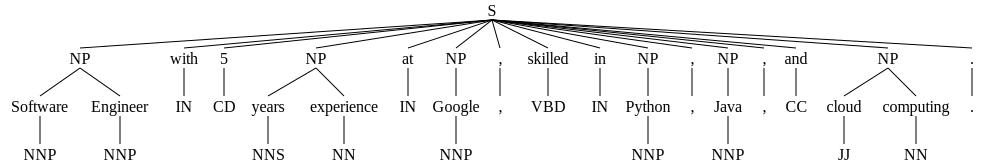

In [19]:
grammer = r"""
NP: {<DT>?<JJ>*<NN.*>+}
"""

chunk_parser = RegexpParser(grammer)

tree = chunk_parser.parse(pos_tags)
tree

NER using spaCy

In [20]:
doc = nlp(sampleresume)
doc.ents

(Software, 5 years, Google, Python, Java)

In [21]:
for ent in doc.ents:
    print(ent.text,':',ent.label_)

Software : ORG
5 years : DATE
Google : ORG
Python : GPE
Java : PERSON


Chunking using ne_chunk

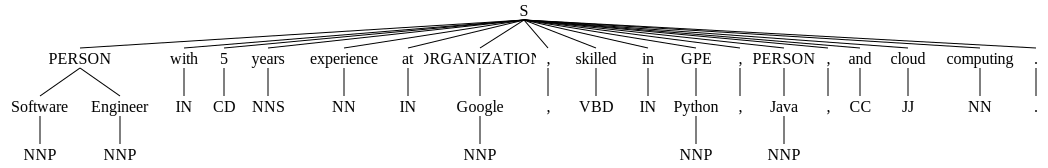

In [22]:
from nltk import ne_chunk
ne_chunk(pos_tags)

In [23]:
print(ne_chunk(pos_tags))

(S
  (PERSON Software/NNP Engineer/NNP)
  with/IN
  5/CD
  years/NNS
  experience/NN
  at/IN
  (ORGANIZATION Google/NNP)
  ,/,
  skilled/VBD
  in/IN
  (GPE Python/NNP)
  ,/,
  (PERSON Java/NNP)
  ,/,
  and/CC
  cloud/JJ
  computing/NN
  ./.)
